In [1]:
from tools import *
import matplotlib.pyplot as plt
import cv2

In [ ]:
get_aligned_images("test/", "aligned_images/")

In [ ]:
get_aligned_images("private_test/", "aligned_images/")

In [ ]:
preds = get_draw_prediction_directory("aligned_images/")

In [ ]:
im = plt.imread("aligned_images/test.png")
preds_1 = preds["aligned_images/test.png"]

predictions = get_features(preds_1)

In [ ]:
im_new = drawAnnotations(im, predictions)

In [ ]:
private_img = "aligned_images/IMG_1811.png"

im = plt.imread(private_img)
preds_1 = get_landmarks_img(private_img)[private_img]
predictions = get_features(preds_1)
im_new = drawAnnotations(im, predictions)

## Key Words Searching

In [1]:
import requests, time, os, shutil
from multiprocessing.dummy import Pool

azureKey="b2101b2ed9744c51b7dd0c0e7ecad979"

def search(search_term, azureKey):
    print('searching using bing: "'+search_term+'"')
    search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
    subscription_key = azureKey
    assert subscription_key
    headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
    params  = {"q": search_term, "imageType": "Photo","count":100}
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    result=[]
    for i in search_results['value']:
        result.append(i['thumbnailUrl'])
    return result


def download(links_in, dir_name, n=None):
    links = links_in[:n]
    print('search results',len(links))
    if os.path.exists(dir_name):
        print('using cache')
        return

    tempName=dir_name+'-'+str(int(time.time()))
    os.makedirs(tempName)
    def fetch(url):
        r=requests.get(url[0], stream=True)
        with open(tempName+'/'+str(url[1]).zfill(4)+".jpg", 'wb') as out_file:
            shutil.copyfileobj(r.raw, out_file)

    modLinks=[[links[i],i+1] for i in range(len(links))]
    Pool(10).map(fetch, modLinks)
    
    try:
        os.rename(tempName,dir_name)
    except:
        shutil.rmtree(tempName)

    print('Items downloaded',len(links))

In [2]:
words_searching = "Lady Gaga"
words_searching = words_searching.replace(' ','_')
cache_path = "downloaded/"

results = search(words_searching, azureKey)
download(results, cache_path + words_searching)

searching using bing: "Lady_Gaga"
search results 100
using cache


In [3]:
get_aligned_images(cache_path + words_searching, cache_path + words_searching + "_aligned", output_size=256, verbose=False)

In [4]:
from beautyGAN.model import beautyGAN

In [5]:
bGAN = beautyGAN()

INFO:tensorflow:Restoring parameters from beautyGAN/model/model


In [6]:
bGAN.generate("aligned_images/original.png", cache_path + words_searching + "_aligned")

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[]

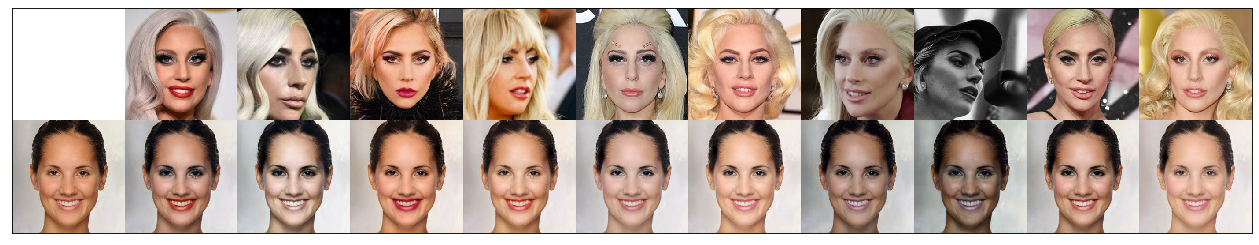

In [7]:
im = plt.imread('result.jpg')
_, ax = plt.subplots(figsize=(20,8), dpi=80)
ax.imshow(im)
ax.set_yticks([])
ax.set_xticks([])

[]

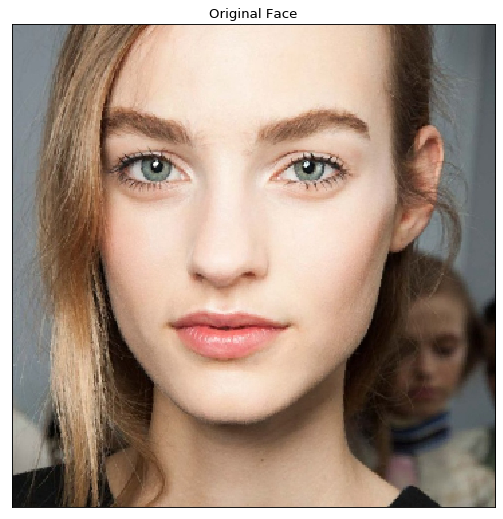

In [14]:
im = plt.imread('beautyGAN/imgs/no_makeup/xfsy_0055.png')
_, ax = plt.subplots(figsize=(20,8), dpi=80)
plt.title("Original Face")
ax.imshow(im)
ax.set_yticks([])
ax.set_xticks([])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[]

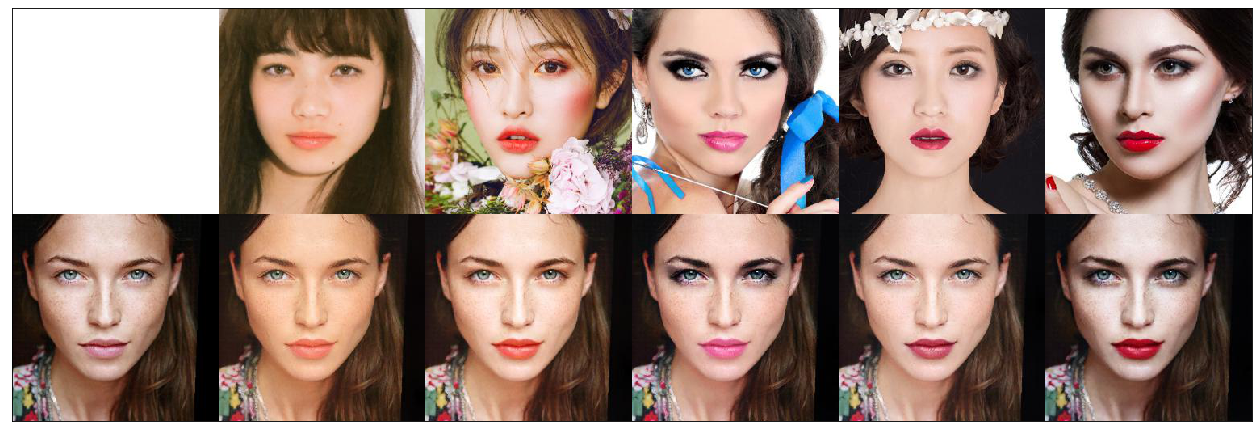

In [30]:
bGAN.generate("beautyGAN/imgs/no_makeup/xfsy_0503.png", "beautyGAN/imgs/makeup", 5)
im = plt.imread('result.jpg')
_, ax = plt.subplots(figsize=(20,8), dpi=80)
ax.imshow(im)
ax.set_yticks([])
ax.set_xticks([])

In [25]:
words_searching = "Popular face"


words_searching = words_searching.replace(' ','_')
cache_path = "downloaded/"

results = search(words_searching, azureKey)
download(results, cache_path + words_searching, 10)
get_aligned_images(cache_path + words_searching, cache_path + words_searching + "_aligned", output_size=256, verbose=False)

searching using bing: "Popular_face"
search results 10
Items downloaded 10


In [26]:
bGAN.generate("beautyGAN/imgs/no_makeup/xfsy_0055.png", cache_path + words_searching + "_aligned", 5)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[]

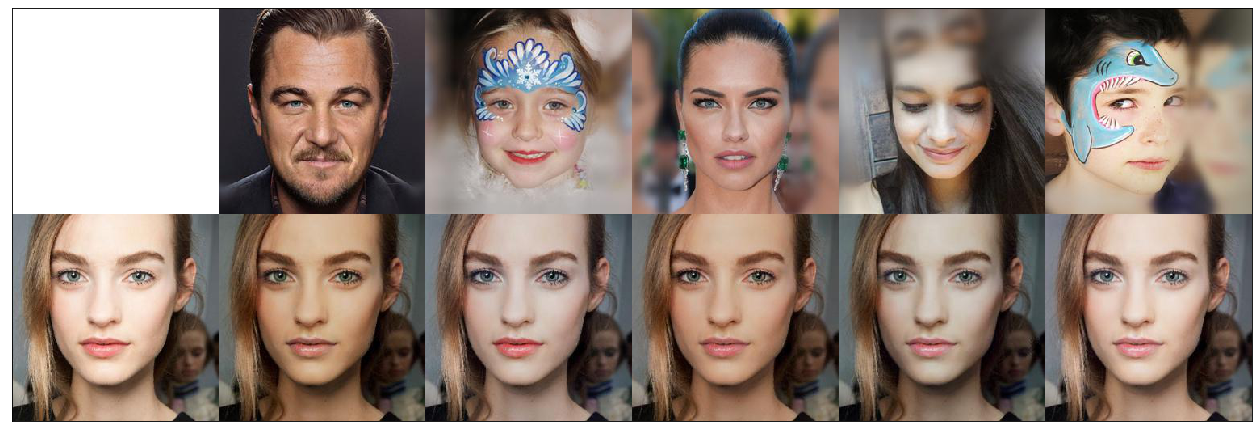

In [27]:
im = plt.imread('result.jpg')
_, ax = plt.subplots(figsize=(20,8), dpi=80)
ax.imshow(im)
ax.set_yticks([])
ax.set_xticks([])